In [36]:
## Kirk Jungles
## Pulse Train

## Class: ECE 435/535 Winter 2020
## Instructor: Mr. McGarvey

## Estimated Time to complete

# Setup Notebook
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd


In [37]:
# Parameters
A = 1 # Amplitude
fc = 2000 # Frequency in Hz (audible range)
PRI = 0.2 # Pulse Repetition Interval(in seconds)

num_periods = 10 # Number of periods in pulse
Tc = 1/fc # Period of center frequency
PW = Tc*num_periods

num_pulses = 10

print('='*20)
print("Time and Frequency")
print('PRI:{} s, PW {}s, Fc {} Hz, Tc {} s'.format(PRI, PW, fc, Tc))
print('\n')

# Spatial information 
vp = 343 # m/s speed of sound 
PRI_x = PRI * vp # Spatial width of PRI
PW_x = PW * vp # Spatial width of Pulse
kc = fc/vp # Wavenumber k for center frequency
Lc = vp/fc # Wavelength of center frequency

print('='*20)
print("Space and Time")
print('PRI: {:.02f} m, PW {:.02f} m, kc {:.02f} cycles/meter, lambda {:.02f} m'
      .format(PRI_x, PW_x, kc, Lc))

Time and Frequency
PRI:0.2 s, PW 0.005s, Fc 2000 Hz, Tc 0.0005 s


Space and Time
PRI: 68.60 m, PW 1.72 m, kc 5.83 cycles/meter, lambda 0.17 m


In [38]:
#Creating Table with data
print('='*20)
print("Time-domain Values")
data1 = [[PRI, PW, fc, Tc],[PRI, PW*1e3, fc/1e3, Tc*1e6]]
pd.DataFrame(data1[1:], columns=["PRI (s)", "PW(ms)", "fc (kHz)", "Tc ($\mu$s)"])


Time-domain Values


,PRI (s),PW(ms),fc (kHz),Tc ($\mu$s)
0,0.2,5.0,2.0,500.0


In [39]:

print('='*20)
print("Space-domain Values")
data2 = [[PRI_x, PW_x, kc, Lc],[PRI_x, PW_x, kc, Lc]]
pd.DataFrame(data2[1:], columns=["PRI (m)", "PW(m)", "kc (cycles/meter)", "$\lambda$ (m)"])


Space-domain Values


,PRI (m),PW(m),kc (cycles/meter),$\lambda$ (m)
0,68.6,1.715,5.830904,0.1715


Desired Sample Rate : 40000.0 samples/sec
Sample Rate Check: is 40000.0 less than 100000 == True
Desired Sample Rate usable
[0. 1. 1. ... 0. 0. 0.]


Text(0.5, 1.0, 'Mask for Pulse Train PW = 0.005s')

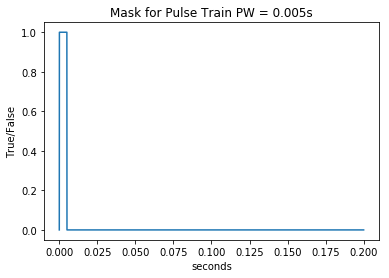

In [40]:
#Creating Waveform
FS_MAX = 100000 # maximum sample rate for audio transmitter

# create the time step for sampling 
fmax = fc 
Tmax = 1/fmax
dt = Tmax/20 #dt = Tcenter frequency / 20

PWidx = np.int(PW/dt)

# calculate required sample rate
fs = 1/dt
derp = fs < FS_MAX
print('Desired Sample Rate : {} samples/sec'.format(fs))
print('Sample Rate Check: is {} less than {} == {}'.format(fs, FS_MAX, derp))

if derp == False:
    print('\n ***** Desired Sample Rate too high! ***** ')
else:
    print('Desired Sample Rate usable')
    
#Create time array
t_unit = PRI
t_vector = np.arange(0,t_unit,dt)


#Mask to zero out non-on region
mask = np.zeros_like(t_vector)
sample = t_vector[0]
idx = 1 
while sample < PW:
    mask[idx] = 1
    idx += 1
    sample = t_vector[idx]

print(mask)

plt.plot(t_vector[:len(mask)],mask)
plt.xlabel('seconds')
plt.ylabel('True/False')
plt.title('Mask for Pulse Train PW = {}s'.format(PW))

Text(0, 0.5, 'Amplitude')

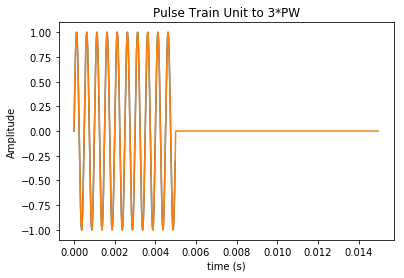

In [41]:
# Create Sine wave
signal = A*np.sin(2. * np.pi*np.int(fc)*t_vector) # Signal length of full time vector

plt.plot(t_vector[0:PWidx], signal[0:PWidx])
plt.title('Fc {} kHz    For one Pulse Width'.format(fc/1e3))
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

#Mask sine wave to create pulsed sine
signal = signal * mask
plt.plot(t_vector[0:3*PWidx],signal[0:3*PWidx])
plt.title('Pulse Train Unit to 3*PW')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

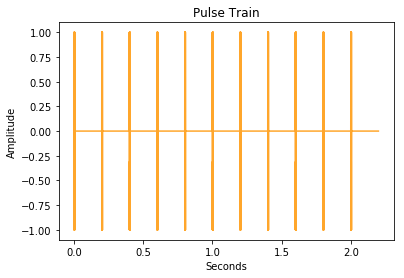

In [42]:
# Repeate Pulses now
t_pulse_train_length = PRI * num_pulses # time in seconds
t_pulse_train = t_pulse_train_length*fs

unit_signal = signal

for idx in range(0,Num_pulses):
    signal = np.concatenate((signal, unit_signal))

t_max = len(signal)
t_vector = np.arange(0,len(signal)*dt,dt)

plt.plot(t_vector, signal, 'xkcd:mango')
plt.title('Pulse Train')
plt.xlabel('Seconds')
plt.ylabel('Amplitude')

In [59]:
# Create .wav file
import wave, datetime, struct

#Create filename
date_str = str(datetime.datetime.now())
date_str = date_str.replace(':','-')
date_str = date_str[0:10] + '_' + date_str[11:19]

fname = 'Pulse_train_' + date_str + '.wav'
print('Filename is: ' + fname)

'''
#Create file
obj = wave.open(fname,'w')
obj.setnchannels(2)
obj.setframerate(fs) #sampling frequency as before
for idx in range(len(signal)):
    data = struct.pack('<h',signal[idx])
    obj.writeframes(data)
obj.close()
'''

from scipy.io.wavfile import write

sample_rate = np.int(fs)

write(fname, sample_rate, signal)




Filename is: Pulse_train_2020-02-17_23-18-46.wav
